# Статистический анализ данных / Python
## Задание 1

**Правила:**

* Дедлайн **17 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 1"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

### Задача 1. (5 баллов)

Пусть $X_1, ..., X_n$ --- выборка из равномерного распределения на отрезе $[0, \theta]$. На занятии было получено, что оценка $X_{(n)}$ является оценкой максимального правдоподобия параметра $\theta$. Покажите, что она является состоятельной оценкой $\theta$:

$$\mathsf{P}_{\theta}(X_{(n)} < \theta - \varepsilon) = ...$$

*Указание.* Вспомните определение $X_{(n)}$ и воспользуйтесь независимостью.

В чем практический смысл состоятельности?

**Ответ:** 
**1).** $X_{(n)}$ является $X_{max}=max(X_1, ..., X_n)$.  
 $X_{(n)} < \theta - \epsilon <=> X_i <  \theta - \epsilon$  для $\forall i = 1, ..., n$.

для любого конкретного $i$:$P(X_i <  \theta - \epsilon) = \frac {(\theta - \epsilon)}{\theta}$, т.к. распределение равномерное

вероятность что сразу для всех n штук i у нас $\theta_i < \theta - \epsilon$ это

$P(X_{n} <  \theta - \epsilon) = (\frac {(\theta - \epsilon)}{\theta})^n -> 0$ , когда $n -> \infty$, что нам и требовалось доказать, исходя из определения из лекции.

**2).** С увеличением объема выборки при использовании состоятельной оценки мы ошибаемся, если так можно сказать, меньше. Так как мы все больше приближаемся к истинному значению с ростом объема выборки, у нас есть причина увеличивать этот самый объем выборки. Собственно, одно и вытекает из другого.

Оценка $X_{(n)}$ не является асимптотически нормальной, но в данном случае можно доказать свойство круче:
$$n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right).$$  
Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них оценку $X_{(n)}$ параметра $\theta$ в зависимости от размера выборки и визуализировав рассматриваемое свойство.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из равномерного распределения на отрезке $[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $T_{jn} = n \left( \theta - \widehat{\theta}_{jn} \right)$, где $\theta = 1$.

In [169]:
size = 300 #количество выборок
samples_count = 500 # размер одной выборки
n_range = np.arange(size) + 1

samples=sps.uniform(loc=0, scale=1).rvs(size=(samples_count, size))
estimation =np.maximum.accumulate(samples,axis=1)

print (estimation)

Tjn= (1-estimation)*(n_range)

[[0.79032247 0.99839375 0.99839375 ... 0.99839375 0.99839375 0.99839375]
 [0.93707219 0.93707219 0.93707219 ... 0.99158691 0.99158691 0.99158691]
 [0.57650237 0.57650237 0.62588309 ... 0.9994122  0.9994122  0.9994122 ]
 ...
 [0.29120155 0.77063487 0.77063487 ... 0.99865526 0.99865526 0.99865526]
 [0.36846428 0.4171499  0.4171499  ... 0.99437967 0.99437967 0.99437967]
 [0.67036502 0.67036502 0.67036502 ... 0.99992401 0.99992401 0.99992401]]


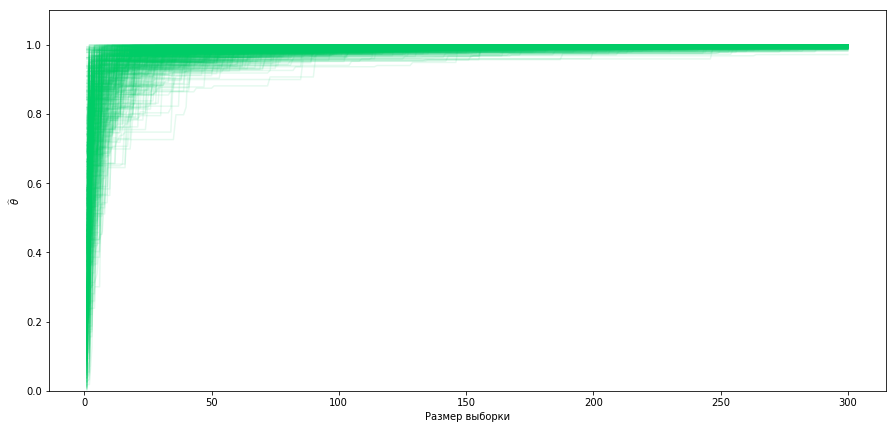

In [170]:
green = '#00CC66' # график для себя
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, estimation[i], 
             color=green, alpha=0.1)
plt.ylabel('$\\widehat{\\theta}$')
plt.xlabel('Размер выборки')
plt.ylim((0, 1.1))
plt.show()

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Все кривые должны быть нарисованы *одним и тем же цветом* с прозрачностью `alpha=0.1`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

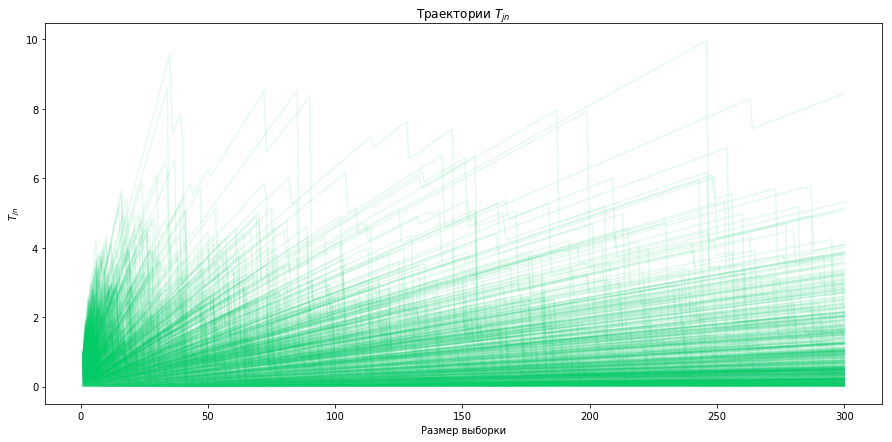

In [171]:
green = '#00CC66'
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, Tjn[i], 
             color=green, alpha=0.1)
plt.title('Траектории $T_{jn}$')
plt.xlabel('Размер выборки')
plt.ylabel('$T_{jn}$')
plt.show()

**Ответ:** Значения статистики действительно сходятся к константе, равной единице.

Для $n=500$ по выборке $T_{1,500}, ..., T_{300,500}$ постройте гистограмму и график плотности распределения $Exp(1)$.  Не забудьте сделать легенду.

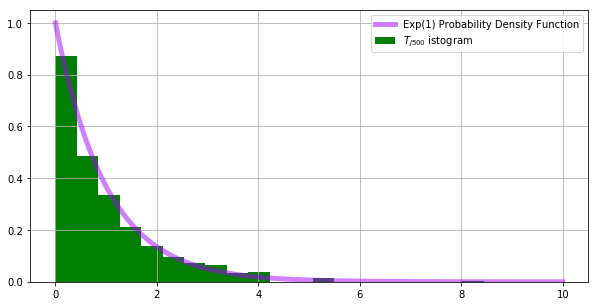

In [172]:
grid = np.linspace(0,10, 2000)

plt.figure(figsize=(10, 5))
plt.hist(Tjn[:, -1], bins=20, density=True, color='green',label = '$T_{j500}$ istogram')
plt.plot(grid, sps.expon(scale=1).pdf(grid), lw=5, color='#a200ff', label = 'Exp(1) Probability Density Function',alpha=0.5)
plt.legend()

plt.grid()
plt.show()

Сделайте вывод по задаче и ответьте на вопросы:
* Хорошо ли гистограмма приближает плотность распределения $Exp(1)$? 
* Подтверждают ли проведенные эксперименты свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$?
* Чем это свойство круче асимптотической нормальности и как это может быть полезно на практике?

**Вывод:** 

**1).** Гистограма неплохо приближает плотность распределения $Exp(1)$. С ростом количества элементов гистограмма еще больше приблизилась бы к кривой, соответствующей графику плотности распределения.

**2).** Данные не противоречат данному свойству. 

**3).** Возможно, подобное свойство в нашем случае связывает отклонение оценки параметра от его реального значения, и мы получаем, что, в отличии от случая с асимтотической нормальностью, мы можем отклоняться только в одну сторону, при этом большие отклонения маловероятны. 

### Задача 2. (5 баллов)
В этом задании нужно сделать оценку ОМП для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.


Скачайте данные по ссылке http://archive.ics.uci.edu/ml/machine-learning-databases/wine и загрузите их с помощью библиотеки pandas

In [175]:
data=pd.read_csv('wine.data',header=None)

In [181]:
data.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [183]:
data.head()#.rename({'0': 'Class', '1': 'Alcohol', '2': 'Malic acid','3': 'Ash','4': 'Alcalinity of ash','5': 'Magnesium','6': 'Total phenols','7': 'Flavanoids','8': 'Nonflavanoid phenols','9': 'Proanthocyanins','10': 'Color intensity','11': 'Hue','12': 'OD280/OD315 of diluted wines','13': 'Proline'},axis=1)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Пусть выборка $(X_1, \dots, X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со вектором средних $\mu \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.
Можно показать, то оценками максимального правдоподобия являются
$$\widehat{\mu} = \overline{X},\ \ \ \widehat{\Sigma}=\frac{1}{n}\sum_{i=1}^n \left(X_i - \widehat{\mu}\right)\left(X_i - \widehat{\mu}\right)^T$$

Class                             1.938202
Alcohol                          13.000618
Malic acid                        2.336348
Ash                               2.366517
Alcalinity of ash                19.494944
Magnesium                        99.741573
Total phenols                     2.295112
Flavanoids                        2.029270
Nonflavanoid phenols              0.361854
Proanthocyanins                   1.590899
Color intensity                   5.058090
Hue                               0.957449
OD280/OD315 of diluted wines      2.611685
Proline                         746.893258
dtype: float64

Рассмотрим колонки "Alcalinity of ash", "Proanthocyanins", "Hue". Предположим, что
данные в них образуют выборку из многомерного нормального распределения с неизвестными
параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что
данные визуально похожи на нормальное распределение:

In [184]:
cols=["Alcalinity of ash", "Proanthocyanins", "Hue"]

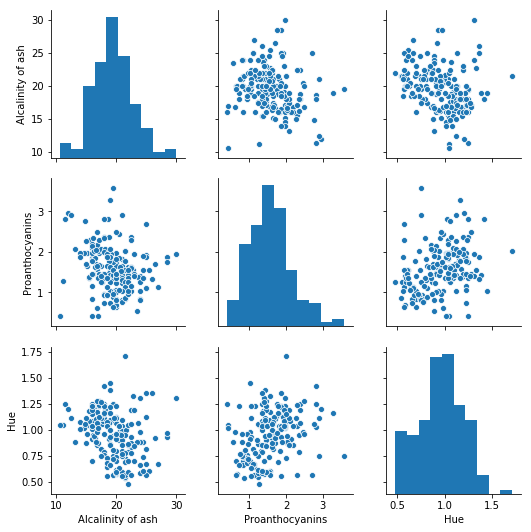

In [185]:
sns.pairplot(data[cols])

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $\mu$ и матрицы ковариаций $\Sigma$ по выборке:

In [200]:
def mle_for_mean(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    """
    sample=pd.DataFrame(sample)
    return np.array(sample.mean())
    

In [201]:
mle_for_mean(data[cols])

array([19.49494382,  1.59089888,  0.95744944])

In [239]:
sample=data[cols]

In [243]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """
    sample=pd.DataFrame(sample)
    return (1/(sample.shape[0]))*np.dot(((sample-mle_for_mean(sample))).transpose(),(sample-mle_for_mean(sample)))
   

In [244]:
mu = mle_for_mean(sample)
sigma = mle_for_covariance_matrix(sample)

Визуализируйте полученный результат. Для каждой пары признаков постройте график, на котором будут:

1) Точки выборки

2) Плотность нормального распредления с оцененными параметрами в виде линий уровня

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

In [335]:
x, y, z= sps.multivariate_normal(mu, sigma).rvs(size=200).T

In [336]:
var=pd.DataFrame()

In [337]:
varcols=['x','y','z']

In [338]:
var['x']=x
var['y']=y
var['z']=z

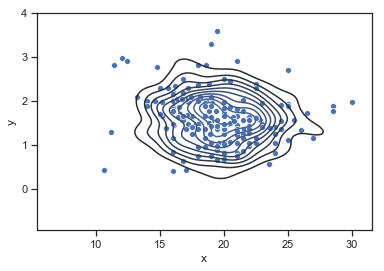

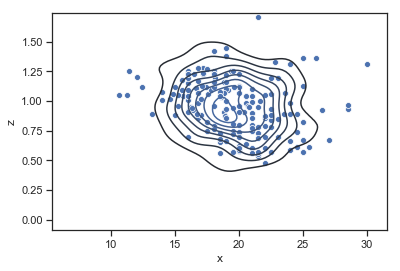

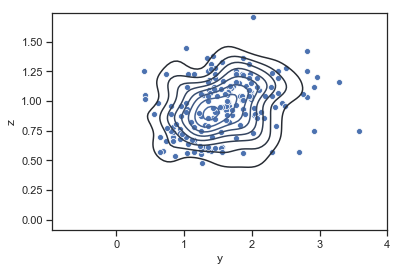

In [339]:

for i in range(3):
    for j in range(i+1,3):
        x,y = k // 3, k % 3
        sns.scatterplot(sample[cols[i]], sample[cols[j]])        
        sns.kdeplot(var[varcols[i]], var[varcols[j]])
        
        plt.show()

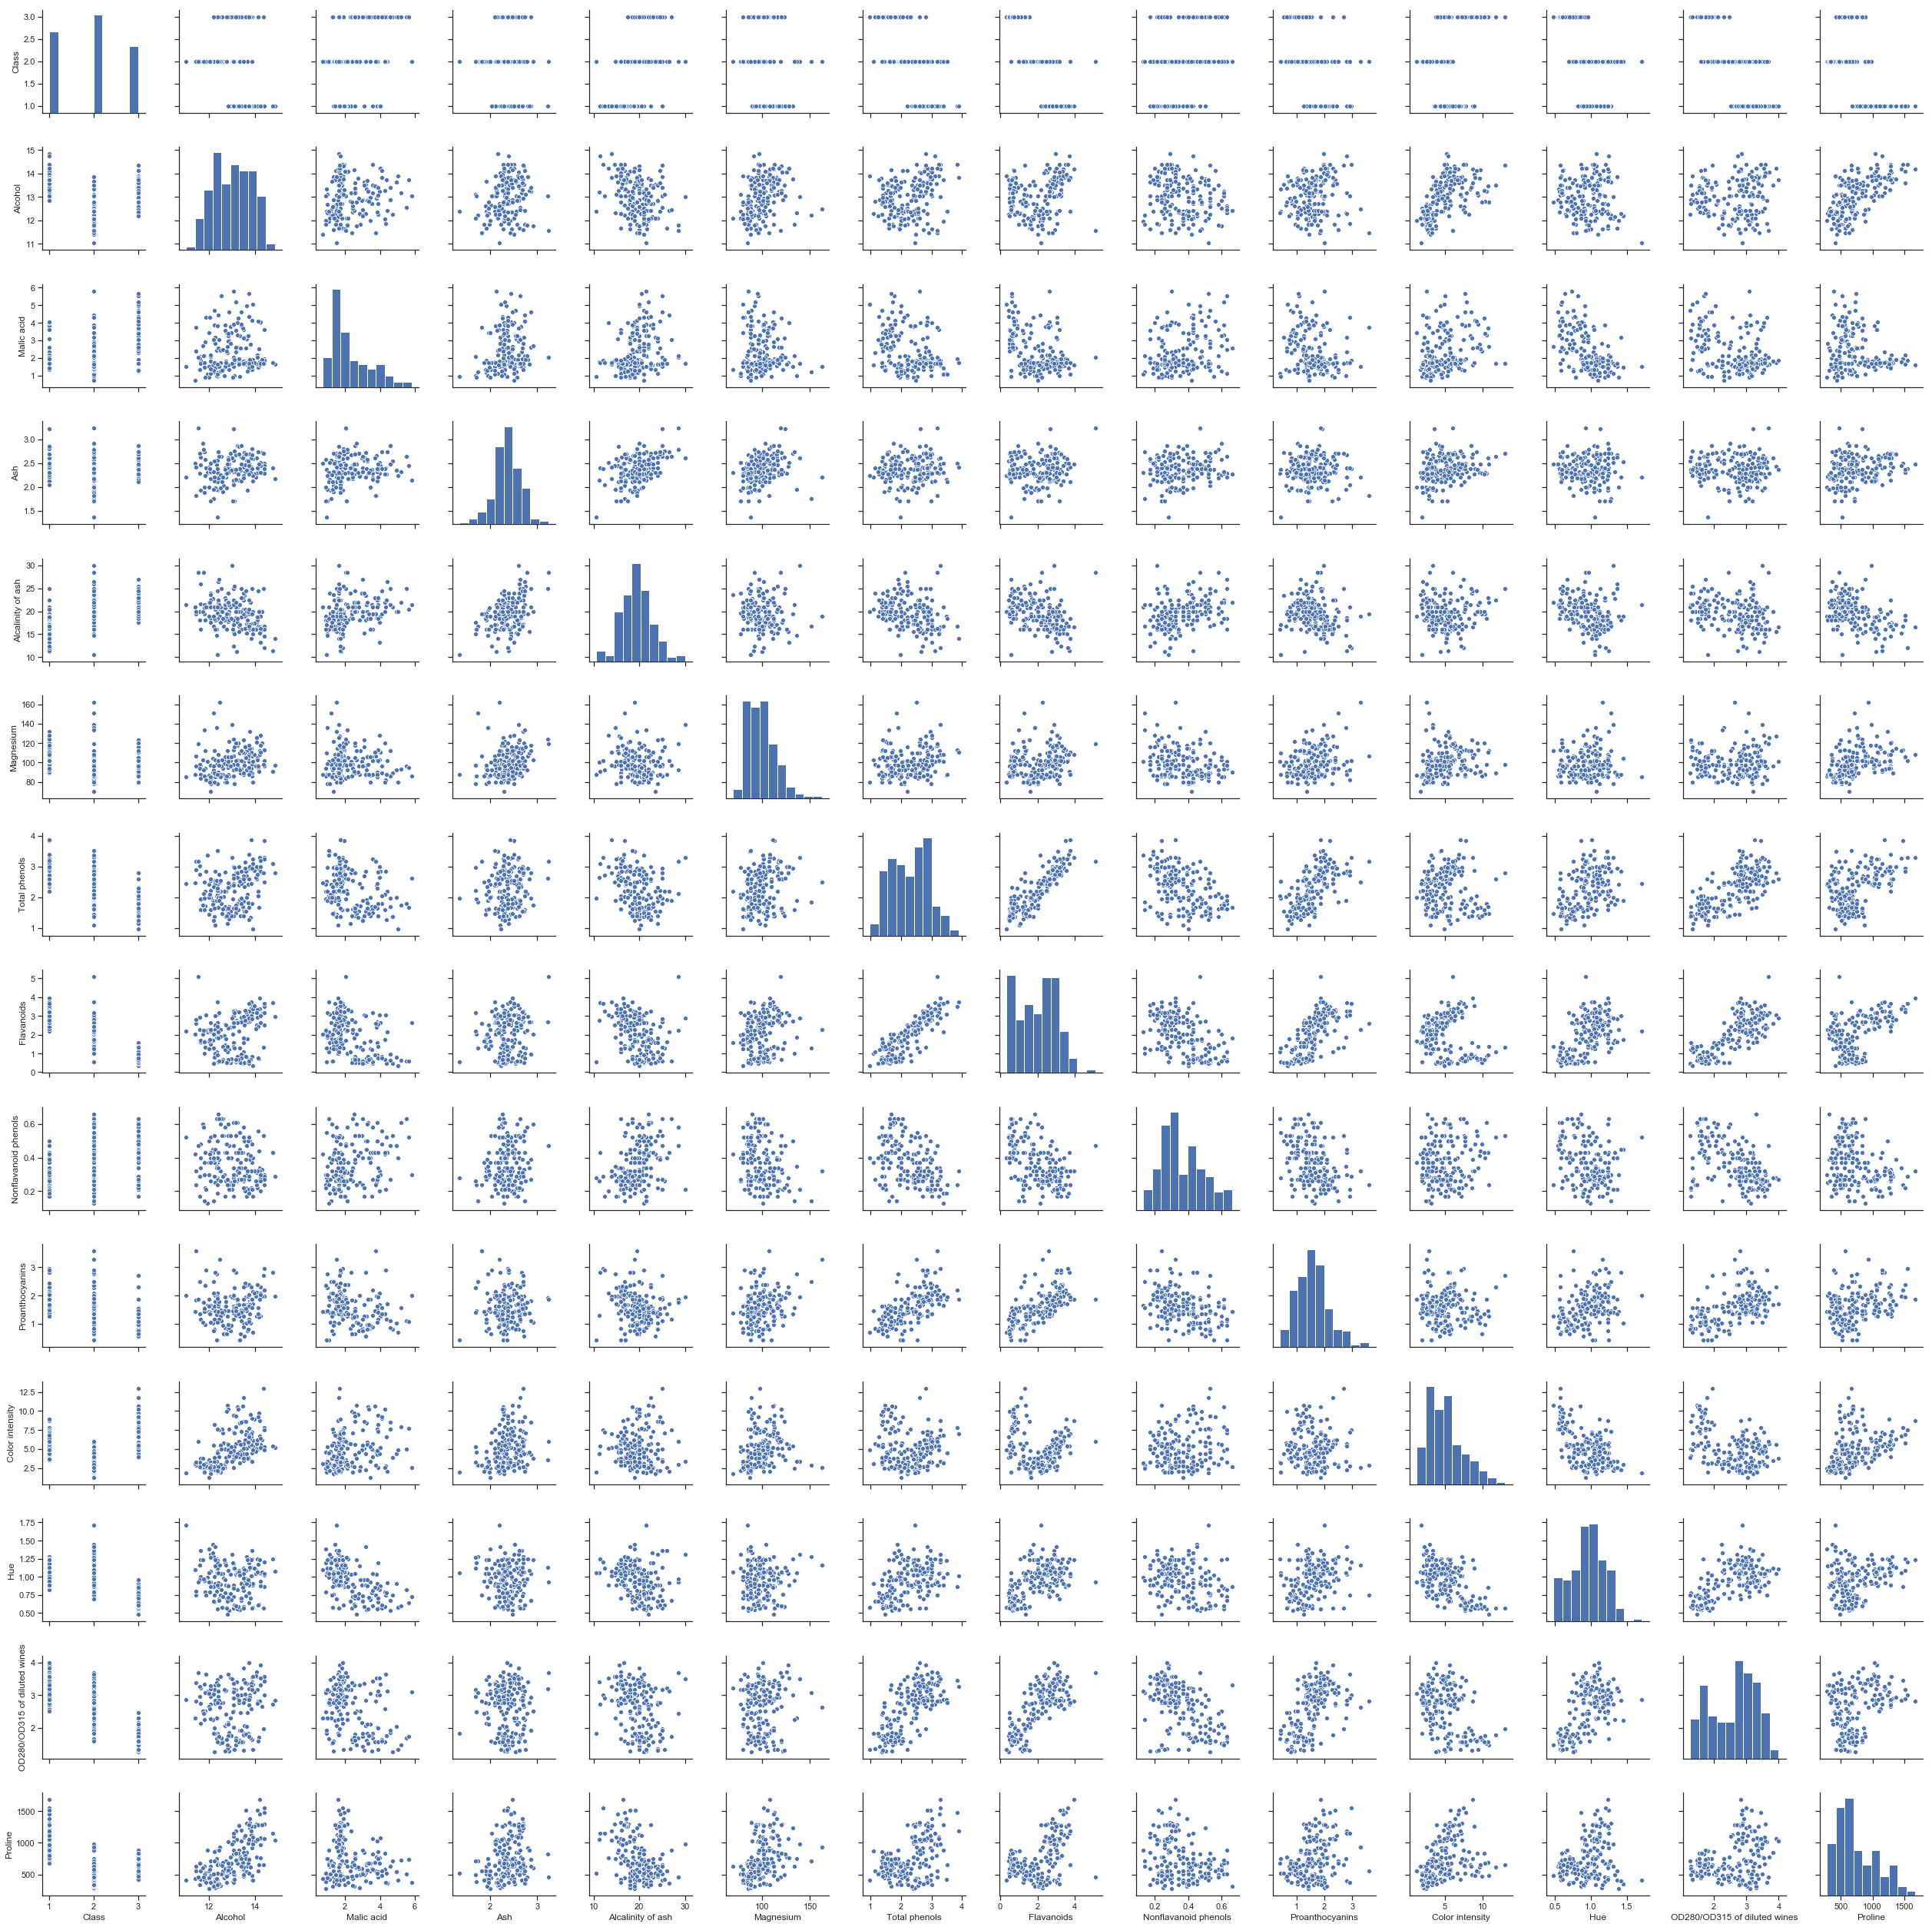

In [340]:
sns.pairplot(data)

Сделайте вывод по задаче и предложите способ уточнения модели, возможно, добавив другие признаки.

**Выводы:** Большая часть точек лежит близ линий уровня плотности нормального распределения, хотя выбросы имеются для всех пар признаков.  (если, конечно, функция для mle матрицы была написана правильно). Из pairplot для всего сета можно заметить(по гистограмме), что, скорее всего, признак Ash имеет нормальное распределение, можно было бы попробовать использовать его.   